# PCA on NCEP reanalysis data as large-scale predictors

1. Select large-scale predictors domain
2. Get station observational data in the domain
3. Standardize observational data and reanalysis data


In [1]:
%matplotlib inline
import os
from datetime import datetime
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap as bm
import xray


### draw a map over central asia area, and grid. For explore and select domain.

grid parameters are same as NCEP reanalysis.

In [2]:
stat_loc = pd.read_csv('../GHCN_station_locations_central_asia.csv')
slat = np.array(stat_loc['LATITUDE'])
slon = np.array(stat_loc['LONGITUDE'])

In [3]:
sub_stat = stat_loc.ix[(stat_loc['LATITUDE']>46.25) & (stat_loc['LATITUDE']<53.75) & \
            (stat_loc['LONGITUDE']>66.25) & (stat_loc['LONGITUDE']<73.75),:]

In [4]:
sub_slat = np.array(sub_stat['LATITUDE'])
sub_slon = np.array(sub_stat['LONGITUDE'])

#### draw different map background, see [basemap's doc](http://matplotlib.org/basemap/users/geography.html)

{31.25: ([<matplotlib.lines.Line2D at 0x7fb9fae00110>],
  [<matplotlib.text.Text at 0x7fb9fad65890>]),
 33.75: ([<matplotlib.lines.Line2D at 0x7fb9fadc24d0>],
  [<matplotlib.text.Text at 0x7fb9fad65d50>]),
 36.25: ([<matplotlib.lines.Line2D at 0x7fb9fadc2a90>],
  [<matplotlib.text.Text at 0x7fb9fad721d0>]),
 38.75: ([<matplotlib.lines.Line2D at 0x7fb9fadc2f90>],
  [<matplotlib.text.Text at 0x7fb9fad72610>]),
 41.25: ([<matplotlib.lines.Line2D at 0x7fb9fadcc650>],
  [<matplotlib.text.Text at 0x7fb9fad72a50>]),
 43.75: ([<matplotlib.lines.Line2D at 0x7fb9fadccc10>],
  [<matplotlib.text.Text at 0x7fb9fad72e90>]),
 46.25: ([<matplotlib.lines.Line2D at 0x7fb9fadd8210>],
  [<matplotlib.text.Text at 0x7fb9fad7d310>]),
 48.75: ([<matplotlib.lines.Line2D at 0x7fb9fadd87d0>],
  [<matplotlib.text.Text at 0x7fb9fad7d750>]),
 51.25: ([<matplotlib.lines.Line2D at 0x7fb9fadd8d90>],
  [<matplotlib.text.Text at 0x7fb9fad7db90>]),
 53.75: ([<matplotlib.lines.Line2D at 0x7fb9fad65390>],
  [<matplotlib.te

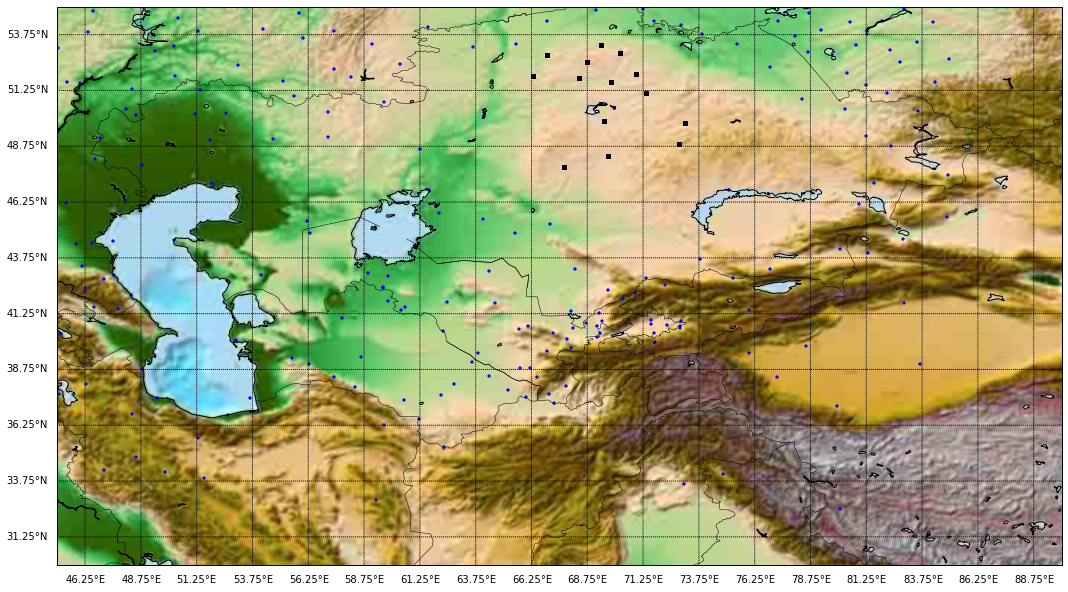

In [5]:
f, ax = plt.subplots(figsize=(18,10))

m = bm(projection='cyl', lat_ts=0,\
       llcrnrlat=30, llcrnrlon=45,\
       urcrnrlat=55, urcrnrlon=90,\
       resolution='i')

m.ax = ax

m.drawcoastlines()
m.drawcountries()

m.etopo()

x, y = m(slon,slat)
m.scatter(x,y,5,marker='o',color='b')

sub_x, sub_y = m(sub_slon,sub_slat)
m.scatter(sub_x,sub_y,20,marker='s',color='k')

m.drawmeridians(np.arange(1.25, 358.5, 2.5), labels=[0,0,0,1])
m.drawparallels(np.arange(1.25, 88.75, 2.5), labels=[1,0,0,0])


### Observational data standardization

select from csv, and standardize them.

In [6]:
# read data from file

# GHCN_1980_2000_Central_Asia_Quality_Control.csv 
# contains all stations that have passed quality control  
df = pd.read_csv('../GHCN_1980_2000_Central_Asia_Quality_Control.csv')

* add temperature data column by merge sub_stat and df
* get a subset containing stations in **sub_stat** and **df**

Four stations left

In [7]:
sub_df = pd.merge(sub_stat, df, on='STATION_NAME', how='left')

In [8]:
# If a station is in sub_stat but not in df (has temperature data), 
# the columns only in df (such as 'YEAR' or 'MNTM') will be set as NaN.

# So, cells not null are in both sub_stat and df

sub_sub_stat = sub_df.ix[-sub_df['YEAR'].isnull(),'STATION_NAME'].drop_duplicates()

In [9]:
sub_sub_stat

2        ATBASAR KZ
45     KARAGANDA KZ
89       KZYLZAR KZ
134       ASTANA KZ
Name: STATION_NAME, dtype: object

#### Plot the only four stations' s location on a map

In [10]:
sub_sub_stat_loc = sub_stat.set_index('STATION_NAME').ix[sub_sub_stat,:]
sub_sub_stat_loc

,LATITUDE,LONGITUDE
STATION_NAME,,
ATBASAR KZ,51.8167,68.3667
KARAGANDA KZ,49.8000,73.1500
KZYLZAR KZ,48.2994,69.6994
ASTANA KZ,51.1331,71.3667


In [11]:
sub_sub_slat = np.array(sub_sub_stat_loc['LATITUDE'])
sub_sub_slon = np.array(sub_sub_stat_loc['LONGITUDE'])

{31.25: ([<matplotlib.lines.Line2D at 0x7fb9fb7ca590>],
  [<matplotlib.text.Text at 0x7fb9fb738d10>]),
 33.75: ([<matplotlib.lines.Line2D at 0x7fb9fb6d2950>],
  [<matplotlib.text.Text at 0x7fb9fb744210>]),
 36.25: ([<matplotlib.lines.Line2D at 0x7fb9fb6d2f10>],
  [<matplotlib.text.Text at 0x7fb9fb744650>]),
 38.75: ([<matplotlib.lines.Line2D at 0x7fb9fb763510>],
  [<matplotlib.text.Text at 0x7fb9fb744a90>]),
 41.25: ([<matplotlib.lines.Line2D at 0x7fb9fb763ad0>],
  [<matplotlib.text.Text at 0x7fb9fb744ed0>]),
 43.75: ([<matplotlib.lines.Line2D at 0x7fb9fb763fd0>],
  [<matplotlib.text.Text at 0x7fb9fb752350>]),
 46.25: ([<matplotlib.lines.Line2D at 0x7fb9fb741690>],
  [<matplotlib.text.Text at 0x7fb9fb752790>]),
 48.75: ([<matplotlib.lines.Line2D at 0x7fb9fb741c50>],
  [<matplotlib.text.Text at 0x7fb9fb752bd0>]),
 51.25: ([<matplotlib.lines.Line2D at 0x7fb9fb738250>],
  [<matplotlib.text.Text at 0x7fb9fb777050>]),
 53.75: ([<matplotlib.lines.Line2D at 0x7fb9fb738810>],
  [<matplotlib.te

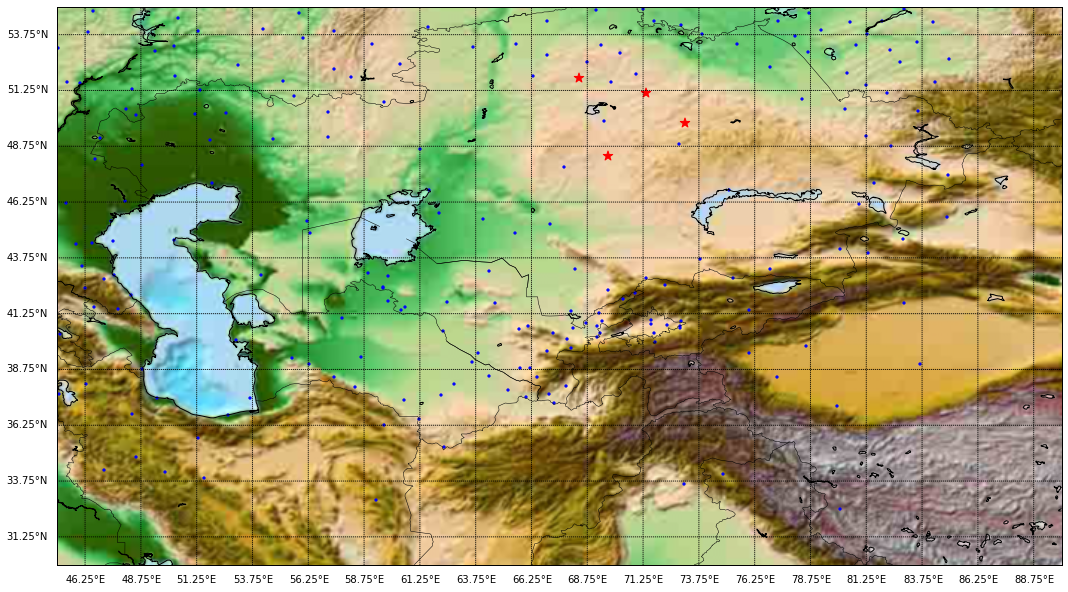

In [12]:
f, ax = plt.subplots(figsize=(18,10))

m = bm(projection='cyl', lat_ts=0,\
       llcrnrlat=30, llcrnrlon=45,\
       urcrnrlat=55, urcrnrlon=90,\
       resolution='i')

m.ax = ax

m.drawcoastlines()
m.drawcountries()

m.etopo()

x, y = m(slon,slat)
m.scatter(x,y,5,marker='o',color='b')

sub_sub_x, sub_sub_y = m(sub_sub_slon,sub_sub_slat)
m.scatter(sub_sub_x,sub_sub_y,100,marker='*',color='r')

m.drawmeridians(np.arange(1.25, 358.5, 2.5), labels=[0,0,0,1])
m.drawparallels(np.arange(1.25, 88.75, 2.5), labels=[1,0,0,0])

In [13]:
(66.25+68.75)/2

67.5

In [14]:
sub_sub_stat_loc2 = sub_sub_stat_loc.reset_index()
sub_sub_df = pd.merge(sub_sub_stat_loc2, df, on='STATION_NAME', how='left')
sub_sub_df.head()

,STATION_NAME,LATITUDE,LONGITUDE,YEAR,MONTH,MNTM
0,ATBASAR KZ,51.8167,68.3667,1980,1,-207
1,ATBASAR KZ,51.8167,68.3667,1980,7,204
2,ATBASAR KZ,51.8167,68.3667,1981,1,-179
3,ATBASAR KZ,51.8167,68.3667,1981,7,202
4,ATBASAR KZ,51.8167,68.3667,1982,1,-169


#### Use dictionary to store each piece of data

* keys are stations' name
* values are dataframe containing 'year', 'month' and 'nmtm' columns

In [15]:
df_dict = {}

In [16]:
for name, data in sub_sub_df.groupby('STATION_NAME'):
    df_dict[name] = data

In [17]:
for key in df_dict:
    print key

ASTANA KZ
KARAGANDA KZ
KZYLZAR KZ
ATBASAR KZ


In [18]:
astana = df_dict['ASTANA KZ']
X_ast = astana.ix[astana['MONTH']==1,'MNTM'].values.astype(float)

In [19]:
from sklearn import preprocessing
scaler  = preprocessing.StandardScaler()
scaler_astana = scaler.fit(X_ast)

In [20]:
X_st = scaler_astana.transform(X_ast)
(X_st.mean(),X_st.std())

(-8.56622973613309e-17, 1.0)

#### Standardization

* Time is Jan. or July.
* Stored in a dictinary **std_tmp_series_dict_[Month]**

In [21]:
std_tmp_series_dict_Jan = {}
std_tmp_series_dict_July = {}

In [22]:
from sklearn import preprocessing

In [23]:
for key in df_dict:
    station = df_dict[key]
    X = station.ix[station['MONTH']==1,'MNTM'].values.astype(float)
    
    scaler  = preprocessing.StandardScaler()
    # fit( ) method need float type data
    scaler_station = scaler.fit(X)
    X_st = scaler_station.transform(X)
    
    # store
    std_tmp_series_dict_Jan[key] = X_st
    
    # verify
    print('----------')
    print 'Station: ' + key
    print("Mean: %.6f" % X_st.mean())
    print("Std.: %.6f" % X_st.std())

----------
Station: ASTANA KZ
Mean: -0.000000
Std.: 1.000000
----------
Station: KARAGANDA KZ
Mean: 0.000000
Std.: 1.000000
----------
Station: KZYLZAR KZ
Mean: 0.000000
Std.: 1.000000
----------
Station: ATBASAR KZ
Mean: -0.000000
Std.: 1.000000


**loop for July**

In [24]:
for key in df_dict:
    station = df_dict[key]
    X = station.ix[station['MONTH']==7,'MNTM'].values.astype(float)
    
    scaler  = preprocessing.StandardScaler()
    # fit( ) method need float type data
    scaler_station = scaler.fit(X)
    X_st = scaler_station.transform(X)
    
    # store
    std_tmp_series_dict_July[key] = X_st
    
    # verify
    print('----------')
    print 'Station: ' + key
    print("Mean: %.6f" % X_st.mean())
    print("Std.: %.6f" % X_st.std())

----------
Station: ASTANA KZ
Mean: 0.000000
Std.: 1.000000
----------
Station: KARAGANDA KZ
Mean: 0.000000
Std.: 1.000000
----------
Station: KZYLZAR KZ
Mean: -0.000000
Std.: 1.000000
----------
Station: ATBASAR KZ
Mean: 0.000000
Std.: 1.000000


**glance at the result**

In [25]:
std_tmp_series_dict_Jan['KARAGANDA KZ']

array([-0.95588609, -0.70178979,  0.27224604,  2.05092016, -0.23594657,
       -0.19359718,  0.94983618,  0.35694481,  0.01814974,  0.69573988,
       -0.78648856,  0.14519789,  1.62742632,  0.52634234, -0.27829595,
       -0.36299472, -2.77690959,  0.44164357, -1.20998239,  0.69573988,
       -0.27829595])

## Standardize large-scale predictors


* Carry out once, make January 850 hPa air temperature as a example
    * import netCDF file, air.mon.mean.nc
    * select time and domain and level
        * Jan.
        * Central Asia
        * 850 hPa
    * reshape to 2-D (time, grid cell)
    * standardize along columns
    * PCA
        * create a pca object
        * train model using fit( )
        * plot how much variance each PC explains
        * select top PCs
        * standardize PCs using `preprocessing.scale( )`
    * store PCs into dictionary
        * key: variable name + level
        * value: top PCs, ndarray
* Abstract a function
    * input parameters and get top PCs as ndarray
    * append to dict
* Run the function for each netCDF file, variables, levels, and months that you are interested in
* Concatenate PCs stored in dict, to build a 2-D matrix
    * row for year
    * col for PCs (may from different large-scale predictors, but all standardized)

In [26]:
nc_path = '/home/ek777/Documents/Downscaling/ncep_monthly_mean/surface'

#### carry out once

In [27]:
nc_name_air = 'air.mon.mean.nc'
dset_air = xray.open_dataset(os.path.join(nc_path, nc_name_air))

In [28]:
dset_air_Jan = dset_air.sel(time=slice('1980-1-1','2000-12-31',12))

In [29]:
dset_air_Jan_850 = dset_air_Jan.sel(level=850)

In [30]:
dset_air_Jan_850_ca = dset_air_Jan_850.sel(lon=slice(67.5,72.5), lat=slice(52.5,47.5))

In [31]:
lat_air_Jan_850_ca = dset_air_Jan_850_ca['lat'].values
lon_air_Jan_850_ca = dset_air_Jan_850_ca['lon'].values
value_air_Jan_850_ca = dset_air_Jan_850_ca['air'].values

X_air_Jan_850_ca = np.reshape(value_air_Jan_850_ca, \
                              (value_air_Jan_850_ca.shape[0], len(lat_air_Jan_850_ca) * len(lon_air_Jan_850_ca)), order='F')


In [32]:
X_air_Jan_850_ca.shape

(21, 9)

In [33]:
from sklearn import preprocessing
X_air_Jan_850_ca_scaled = preprocessing.scale(X_air_Jan_850_ca)

In [34]:
X_air_Jan_850_ca_scaled.mean(axis=0)

array([  4.30459240e-16,  -3.85934670e-16,  -9.51619735e-17,
        -3.28771402e-16,   2.77555756e-17,   4.75809868e-17,
         4.11046858e-16,   3.80647894e-16,   1.50673125e-16])

In [35]:
X_air_Jan_850_ca_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [36]:
from sklearn.decomposition import pca

In [37]:
skpca = pca.PCA()
skpca.fit(X_air_Jan_850_ca_scaled)

PCA(copy=True, n_components=None, whiten=False)

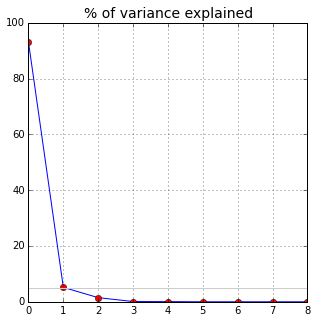

In [38]:
f, ax = plt.subplots(figsize=(5,5))
ax.plot(skpca.explained_variance_ratio_[0:10]*100)
ax.plot(skpca.explained_variance_ratio_[0:10]*100,'ro')
ax.axhline(5, c='0.8')
ax.set_title("% of variance explained", fontsize=14)
ax.grid()

In [39]:
ipc = np.where(skpca.explained_variance_ratio_.cumsum() >= 0.95)[0][0]
ipc

1

In [40]:
PCs = skpca.transform(X_air_Jan_850_ca_scaled)

In [41]:
PCs.shape

(21, 9)

In [42]:
PCs = PCs[:,:ipc]

In [43]:
PCs_scaled = preprocessing.scale(PCs)

In [44]:
PCs_scaled.std(axis=0)

array([ 1.])

In [45]:
all_PCs = PCs_scaled

In [46]:
all_PCs = np.concatenate([all_PCs, PCs_scaled],axis=1)

In [47]:
all_PCs

array([[ -1.16428549e+00,  -1.16428549e+00],
       [  5.71469186e-01,   5.71469186e-01],
       [  2.37591152e-01,   2.37591152e-01],
       [  1.02713971e+00,   1.02713971e+00],
       [  1.02562168e+00,   1.02562168e+00],
       [  9.34327589e-01,   9.34327589e-01],
       [  1.59882541e+00,   1.59882541e+00],
       [  4.55162301e-01,   4.55162301e-01],
       [  3.28661182e-01,   3.28661182e-01],
       [ -1.24977102e+00,  -1.24977102e+00],
       [ -1.30214901e+00,  -1.30214901e+00],
       [ -8.94222730e-01,  -8.94222730e-01],
       [  2.25951006e-01,   2.25951006e-01],
       [  1.21899858e-03,   1.21899858e-03],
       [  3.63217816e-01,   3.63217816e-01],
       [  8.66903209e-01,   8.66903209e-01],
       [ -2.53995229e+00,  -2.53995229e+00],
       [ -1.21401542e+00,  -1.21401542e+00],
       [ -1.24082663e-01,  -1.24082663e-01],
       [  6.65533609e-01,   6.65533609e-01],
       [  1.86855756e-01,   1.86855756e-01]])

### Abstract netCDF data standardization workflow into a function

In [48]:
PCs_dict = {}

In [49]:
from sklearn import preprocessing
from sklearn.decomposition import pca

def generate_PCs_from_nc(dset, level, var):    
    dsub = dset.sel(time=slice('1980-1-1','2000-12-31',12),\
                   lon=slice(67.5,72.5), lat=slice(52.5,47.5),\
                   level=level)

    lat = dsub['lat'].values
    lon = dsub['lon'].values
    value = dsub[var].values

    X = np.reshape(value, (value.shape[0], len(lat) * len(lon)), order='F')
    
    X_scaled = preprocessing.scale(X)
    
    skpca = pca.PCA()
    skpca.fit(X_scaled)
    
    ipc = np.where(skpca.explained_variance_ratio_.cumsum() >= 0.95)[0][0] + 1
    
    PCs = skpca.transform(X_scaled)
    
    PCs = PCs[:,:ipc]
    
    PCs_scaled = preprocessing.scale(PCs)
    
    PCs_dict[var+str(level)] = PCs_scaled
    
    print("variable: %s" % var)
    print("ipc: %d" % ipc)

#### Run functions for each files, variables, levels

In [50]:
nc_name = 'air.mon.mean.nc'
dset = xray.open_dataset(os.path.join(nc_path, nc_name))
dset

<xray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 811)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    air      (time, level, lat, lon) float64 -33.91 -33.91 -33.91 -33.91 ...
Attributes:
    description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
    platform: Model
    Conventions: COARDS
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.html
    NCO: 20121012
    history: Mon Jul  5 21:45:36 1999: ncrcat air.mon.mean.nc /Datasets/ncep.reanalysis.derived/pressure/air.mon.mean.nc /dm/dmwork/nmc.rean.ingest/combinedMMs/air.mon.mean.nc
/home/hoop/crdc/cpreanjuke2farm/cpre

In [51]:
generate_PCs_from_nc(dset, level=850, var='air')

variable: air
ipc: 2


In [52]:
nc_name = 'hgt.mon.mean.nc'
dset = xray.open_dataset(os.path.join(nc_path, nc_name))
dset

<xray.Dataset>
Dimensions:  (lat: 73, level: 17, lon: 144, time: 811)
Coordinates:
  * level    (level) float32 1000.0 925.0 850.0 700.0 600.0 500.0 400.0 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 1948-03-01 ...
Data variables:
    hgt      (time, level, lat, lon) float64 110.0 110.0 110.0 110.0 110.0 ...
Attributes:
    description:  Data from NCEP initialized reanalysis (4x/day).  These are interpolated to pressure surfaces from model (sigma) surfaces.
    platform: Model
    Conventions: COARDS
    references: http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.derived.html
    NCO: 20121012
    history: Created by NOAA-CIRES Climate Diagnostics Center (SAC) from the NCEP
reanalysis data set on 07/07/97 by calc.mon.mean.year.f using
/Datasets/nmc.reanalysis.derived/pressure/hgt.mon.mean.nc
from /Da

In [53]:
generate_PCs_from_nc(dset, level=850, var='hgt')

variable: hgt
ipc: 1


In [54]:
generate_PCs_from_nc(dset, level=500, var='hgt')

variable: hgt
ipc: 2


In [55]:
PCs_Jan_final = np.concatenate(PCs_dict.values(), axis=1)

In [56]:
PCs_Jan_final.shape

(21, 5)

In [57]:
PCs_Jan_final.std(0)

array([ 1.,  1.,  1.,  1.,  1.])

## Linear regression

**Variables: **
* *Y*: One station, January, 1980-2000, mean temperature. ndarray, shape of (21,1)
    * for example, **std_tmp_series_dict_Jan['KARAGANDA KZ']**
* *X*: PCs from different NCEP reanalysis data file, 
    * over a selected domain, 9 grid cell here
    * January, 1980-2000, totally 21 years. 
    * ndarray, shape of (21,n), n is the number of PCs
    * as a test, **PCs_Jan_final**

In [58]:
Y = std_tmp_series_dict_Jan['KARAGANDA KZ']
Y.shape

(21,)

In [59]:
X = PCs_Jan_final
X.shape

(21, 5)

#### Explore relation

Draw a scatter plot to explore and validate linear relationship

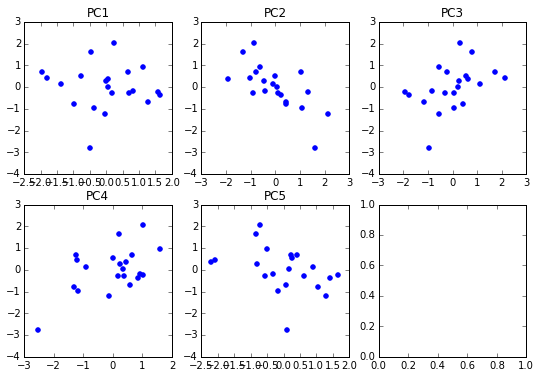

In [60]:
f, axes = plt.subplots(nrows=2,ncols=3, figsize=(9,6))
axes = axes.flatten()
for i in range(5):
    axes[i].scatter(X[:,i], Y,  color='b')
    axes[i].set_title('PC'+str(i+1))


In [61]:
from sklearn import linear_model

In [62]:
regr = linear_model.LinearRegression()

#### Train model

Here, I use the first year (1980) as the test data, and use the rest as train dataset

In [63]:
regr.fit(X[1:,:], Y[1:])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
# The coefficients
print 'Coefficients: \n' + str(regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X) - Y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X, Y))

Coefficients: 
[-0.65128276 -0.26087532  0.30560964  1.07717347  0.1553978 ]
Residual sum of squares: 0.15
Variance score: 0.85


In [65]:
print("y_hat: %.5f" % regr.predict(X[0,:]))
print("y:     %.5f" % Y[0])

y_hat: -1.31360
y:     -0.95589


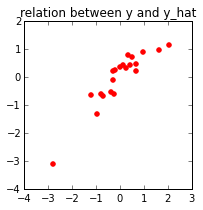

In [66]:
f, axes = plt.subplots(nrows=1,ncols=1, figsize=(3,3))

axes.scatter(Y, regr.predict(X),color='r')
axes.set_title('relation between y and y_hat')


### Abstract a function to carry out cross validation

* given X and Y
* loop for every point in X, train model with the rest in X, use the model predict a Y_hat, and finally get Y_hat series
* return correlation coefficient between Y, and Y_hat

In [67]:
def cross_valid(X,Y):
    regr = linear_model.LinearRegression()
    
    Y_hats = []
    
    for year in range(len(Y)):
        index = range(len(Y))
        base_point = index.pop(year)
        regr.fit(X[index,:], Y[index])
        Y_hats.append(regr.predict(X[base_point,:]))
    
    Y_hats = np.array(Y_hats)
    
    corr = np.corrcoef(Y_hats.T, Y)
    
    return corr[0,1]

In [68]:
cross_valid(X,Y)

0.84636554958260557

### Final Result

loop for every station and store result in a dict, **stat_corr_dict**

In [69]:
stat_corr_dict = {}

In [70]:
for station in std_tmp_series_dict_Jan:
    X = PCs_Jan_final
    Y = std_tmp_series_dict_Jan[station]
    
    stat_corr_dict[station] = cross_valid(X,Y)

In [71]:
final = pd.Series(stat_corr_dict)
final

ASTANA KZ       0.770817
ATBASAR KZ      0.692528
KARAGANDA KZ    0.846366
KZYLZAR KZ      0.860413
dtype: float64